In [45]:
import pandas as pd

# Read raw dataset
rd = pd.read_csv("data/camp1_readings.csv")
print(rd.head(1))

  device_id          ts   bat  acc1  acc2  acc3  acc4  acc5           wei  \
0  f4f4f4f4  1543830282  3718   600     0     0     0     0  2.802597e-45   

   tmp1  tmp2  tmp3  lat  lon  ts_gps checksum  
0   351   352   361  0.0  0.0       0       df  


In [22]:
# Convert unix timestamp to date

rd['date'] = pd.to_datetime(rd['ts'],unit='s')
# print(rd['date'])

In [23]:
# temperature = tmpX / 16

rd['tmp1'] = rd['tmp1'] / 16
rd['tmp2'] = rd['tmp2'] / 16
rd['tmp3'] = rd['tmp3'] / 16

#print(rd.head(1))

In [24]:
# split day and hour

rd['day'] = [d.date() for d in rd['date']]
rd['hour'] = [d.time() for d in rd['date']]
#rd.day.unique()
#rd.day.value_counts().head()

In [25]:
import datetime

day_one = rd.loc[rd.day == datetime.date(2018, 12, 13)]
day_two = rd.loc[rd.day == datetime.date(2018, 12, 14)]
#day_one.device_id.value_counts().head()

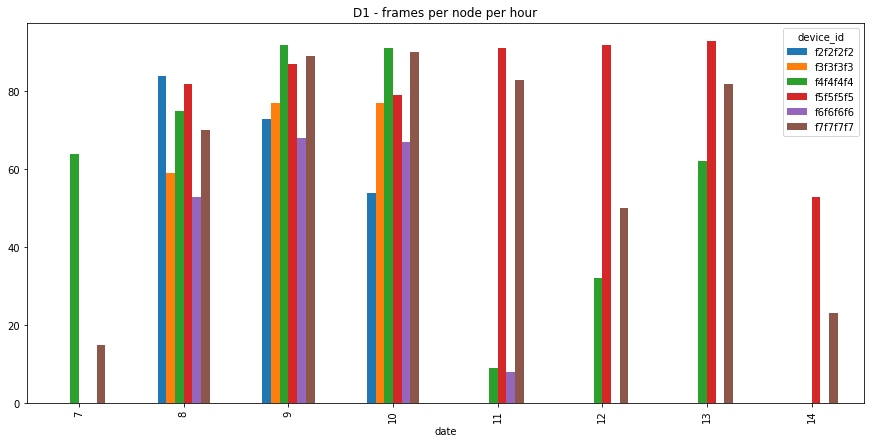

In [26]:
import matplotlib.pyplot as plt

t1 = pd.DatetimeIndex(day_one.date)
fig, ax = plt.subplots(figsize=(15,7))

day_one.groupby([t1.hour, 'device_id']).count()['ts'].unstack().plot.bar(ax=ax, title="D1 - frames per node per hour")

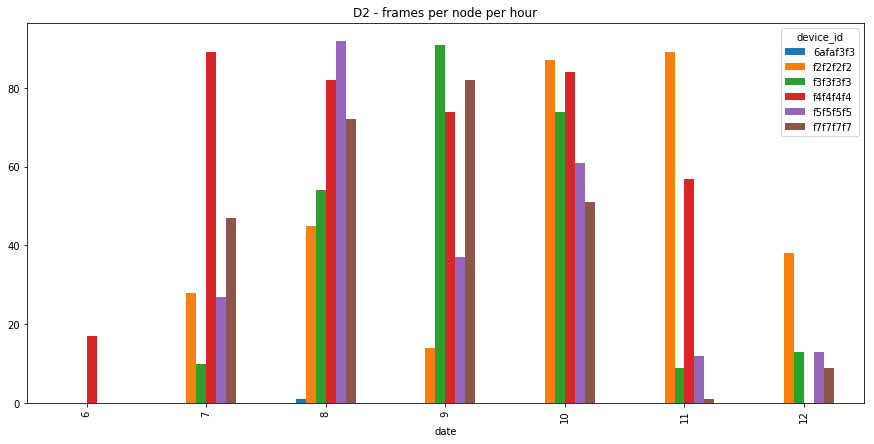

In [27]:
t2 = pd.DatetimeIndex(day_two.date)
fig, ax = plt.subplots(figsize=(15,7))

day_two.groupby([t2.hour, 'device_id']).count()['ts'].unstack().plot.bar(ax=ax, title="D2 - frames per node per hour")

In [28]:
#test bokeh

# 1. Import Modules
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

# 2. Create Figure
p = figure(plot_width = 600, plot_height = 400, title = 'My First Plot')

# 3. Add Glyphs
x = [1, 2, 3, 4, 5]
y = [10, 20, 40, 80, 160]
p.circle(x, y, color = 'red', alpha = 0.5, size = 15)

# 4. Show the plot
output_notebook()
show(p)


Loading BokehJS ...

In [55]:
import math

# convert lat and long to mercator projection
def merc(_lat, _lon):
    lat = (_lat.values[0] / 100) * -1.0
    lon = (_lon.values[0] / 100) * -1.0
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    print(scale)
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

In [ ]:
# remove non gps marked data for day one
day_one_marked = day_one[day_one['lat'] > 0].dropna()
print(day_one_marked['lat'])